# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
np.random.seed = 2021
iris = load_iris()
print('data contains:', iris.keys())
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=  train_test_split(X, y)  # split to train and test

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

dict = {}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for k_i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k_i).fit(X_train_scaled, y_train)  # Train for different K
    dict[k_i] = knn.score(X_test_scaled,y_test)

print(dict)

{1: 0.9473684210526315, 2: 0.9473684210526315, 3: 0.9473684210526315, 4: 0.9473684210526315, 5: 0.9473684210526315, 6: 0.9473684210526315, 7: 0.9473684210526315, 8: 0.9473684210526315, 9: 0.9473684210526315, 10: 0.9473684210526315, 11: 0.9473684210526315, 12: 0.9473684210526315, 13: 0.9473684210526315, 14: 0.9473684210526315, 15: 0.9473684210526315, 16: 0.9210526315789473, 17: 0.9473684210526315, 18: 0.9210526315789473, 19: 0.9736842105263158}


In [24]:
k_best = max(dict, key=dict.get)  # 'compute the best k'
score_best = dict[k_best]  # 'compute the best score'
print('The best k = {} , score = {}'.format(k_best, score_best))

The best k = 19 , score = 0.9736842105263158


## Synthetic dataset  

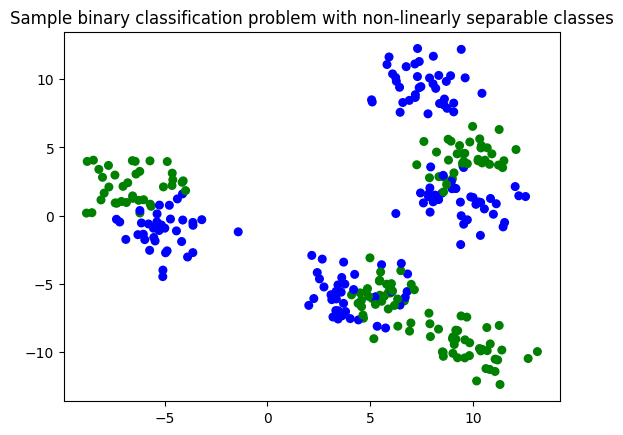

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# %matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue', '#FFFF00', 'black', 'green'])

np.random.seed = 2021
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8,
                        cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2,
            marker='o', s=30, cmap=cmap_bold)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

dict2 = {}
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k_i in range(1, 20):
    knni = KNeighborsClassifier(n_neighbors=k_i).fit(X_train_scaled, y_train)
    dict2[k_i] = knni.score(X_test_scaled, y_test)

print(dict2)

{1: 0.92, 2: 0.8666666666666667, 3: 0.8933333333333333, 4: 0.88, 5: 0.8933333333333333, 6: 0.88, 7: 0.8933333333333333, 8: 0.8933333333333333, 9: 0.9066666666666666, 10: 0.8933333333333333, 11: 0.8933333333333333, 12: 0.92, 13: 0.9333333333333333, 14: 0.9333333333333333, 15: 0.9466666666666667, 16: 0.9066666666666666, 17: 0.9333333333333333, 18: 0.92, 19: 0.9333333333333333}


In [28]:
k_best = max(dict2, key=dict2.get)  # 'compute the best k'
score_best = dict2[k_best]  # 'compute the best score'
print('The best k = {} , score = {}'.format(k_best, score_best))

The best k = 15 , score = 0.9466666666666667


In [29]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.01,plot_symbol_size = 50):

    '''
    similar to plot_decision_boundary_original_X  but considers also test samples
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    Note: make sure to provide the same data as provided for fit (e.g. scaled) but without "one" column
    Copied and modified from adspy_shared_utilities.py'''

    # Create color maps
    from matplotlib.colors import  ListedColormap
    import matplotlib as mpl

    colors_for_areas= [mpl.cm.viridis(.45),mpl.cm.viridis(.6)]
    colors_for_points = [mpl.cm.viridis(.3),mpl.cm.viridis(.75)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = precision #.01  # step size in the mesh

    X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Creates grids of values
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))

    # numpy.c_  concatenation along the second axis
    # ravel() Returns a contiguous flattened array.
        # x = np.array([[1, 2, 3], [4, 5, 6]])
        # np.ravel(x) = [1 2 3 4 5 6]
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])# 2-column ndarray # creates the all possible pairs
    # m= target_samples_grid.shape[0]
    # target_samples_grid_1= np.c_[np.ones(shape=(m,1)),target_samples_grid]
    print ('Call prediction for all grid values (precision of drawing = {}, you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    import matplotlib.patches as mpatches
    patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
    plt.legend(handles=[patch0, patch1])
    plt.title(title)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.show()

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


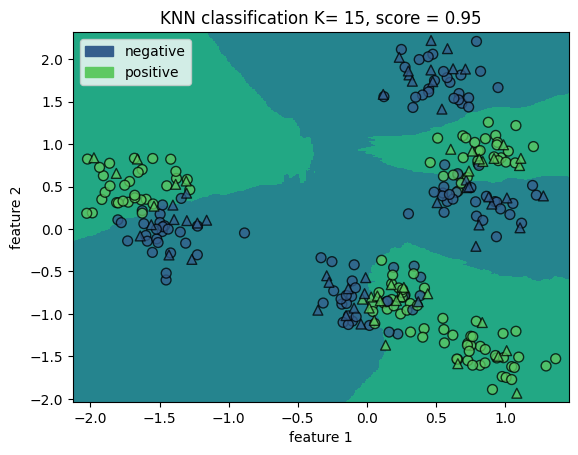

In [30]:
# visualize decision boundary

clf = KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train_scaled, y_train)
score = clf.score(X_test_scaled, y_test)
zxc = plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test=y_test,
                             title='KNN classification K= {}, score = {:.2f}'.format(
                                 k_best, score),
                             precision=0.01, plot_symbol_size=50)